
The simplest example of a neural network to show in a deep learning class is a single-layer perceptron (SLP) or a feedforward neural network with the following properties:

Example: Single-Layer Perceptron for Binary Classification
Input: 2 features 
Output: A single binary classification (e.g., 0 or 1).
Architecture:
Input layer: 2 neurons (one for each feature).
Output layer: 1 neuron with a step or sigmoid activation function.

Decision boundary: A line (for step activation) separating the two classes.
Teaching Notes:
Start by explaining how the perceptron learns a linear decision boundary.
Show training via a simple dataset like AND, OR, or XOR (explain why XOR fails without multiple layers).
Demonstrate forward and backward propagation intuitively if possible.
Tool/Framework:
Use Python with a simple library like NumPy or TensorFlow/Keras for live coding:

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Data: AND logic
X = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
y = torch.tensor([[0.0], [0.0], [0.0], [1.0]])

# Define the model
class SimplePerceptron(nn.Module):
    def __init__(self):
        super(SimplePerceptron, self).__init__()
        self.fc = nn.Linear(2, 1)  # 2 input features, 1 output neuron
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

model = SimplePerceptron()

# Define loss and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Training loop
epochs = 100
for epoch in range(epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Predictions
with torch.no_grad():
    predictions = model(X)
    print("\nPredictions:")
    print(predictions)

Epoch [10/100], Loss: 0.4149
Epoch [20/100], Loss: 0.2849
Epoch [30/100], Loss: 0.2090
Epoch [40/100], Loss: 0.1617
Epoch [50/100], Loss: 0.1301
Epoch [60/100], Loss: 0.1078
Epoch [70/100], Loss: 0.0913
Epoch [80/100], Loss: 0.0786
Epoch [90/100], Loss: 0.0686
Epoch [100/100], Loss: 0.0606

Predictions:
tensor([[5.4010e-04],
        [6.4557e-02],
        [6.8589e-02],
        [9.0389e-01]])


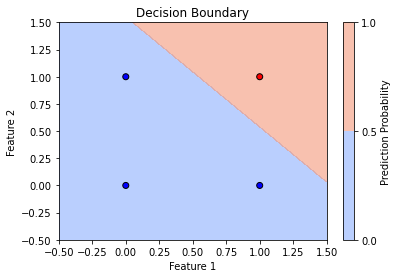

In [6]:
# Plot input space and decision boundary
def plot_decision_boundary(model, X, y):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

    # Predict on the grid
    with torch.no_grad():
        preds = model(grid).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], alpha=0.6, cmap="coolwarm")
    plt.colorbar(label="Prediction Probability")

    # Plot the input data points
    plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap="bwr", edgecolor="k")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

# Convert data to numpy for visualization
X_np = X.numpy()
y_np = y.numpy()

# Plot
plot_decision_boundary(model, X_np, y_np)